In [1]:
%matplotlib inline
import json
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
# import json file with optimization results
with open('results.json') as json_data:
    res = json.load(json_data)

#x = res.keys()
#y = res.values()

# generate nr of groups of points
#groups = np.arange(1,len(x)+1)

# Optimization time distribution
Distribution of resolution time when time limit is set to 9999

In [3]:
# collect timings for each data point and each distribution id
# only for the case without time constraint
optimTime = {}
pointsNr = 0
for point, val in res.items():
    pointsNr += 1
    for distrId, val in val.items():
        optimTime.setdefault(point, [])
        optimTime[point].append(res[point][distrId]['9999']['runningTime[mS]'])

Text(0,0.5,'Time [ms]')

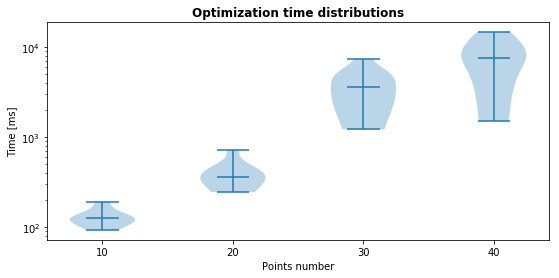

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
# plot violin plot
axes.violinplot(list(optimTime.values()),np.arange(pointsNr),showmeans=False,showmedians=True)
axes.set_title('Optimization time distributions [ms]', fontweight='bold')
axes.set_yscale('log')
plt.setp(axes, xticks=np.arange(pointsNr),xticklabels=list(optimTime.keys()))
plt.xlabel('Points number')
plt.ylabel('Time [ms]')

# Delta from optimal solution
Distribution of deltas from the optimal solution

In [6]:
deltas = {}
deltasArr = {}
for point, val in res.items():
    for distrId, val in val.items():
        for timing, val in val.items():
            deltas.setdefault(timing, {})
            deltasArr.setdefault(timing, {'x': [], 'y': []})
            
            deltas[timing].setdefault(point, [])
            deltas[timing][point].append(val['deltaFromOpt[%]'])
            
            deltasArr[timing]['x'].append(int(point))
            deltasArr[timing]['y'].append(val['deltaFromOpt[%]'])

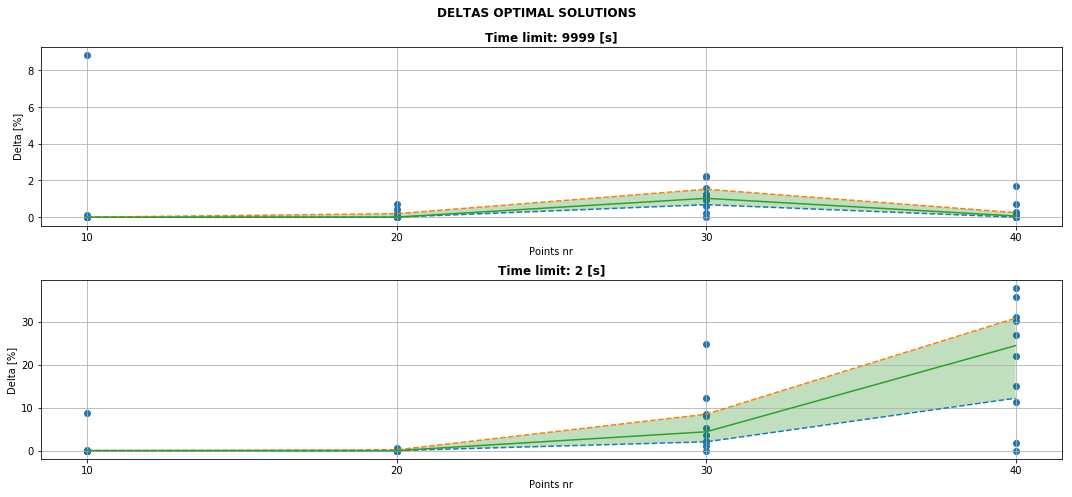

In [99]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))
fig.suptitle('DELTAS OPTIMAL SOLUTIONS', fontweight='bold')

orderedKeys = sorted(deltasArr.keys(), reverse=True)
for i, t in enumerate(orderedKeys):
    timing = deltasArr[t]
    ax[i].scatter(timing['x'], timing['y'])
    
    # calculate interquantile range
    x = [int(key) for key in deltas[t].keys()]
    yQ = {'0.25':0, '0.5':0, '0.75':0}
    for q in yQ.keys():
        yQ[q] = [np.quantile(deltas[t][point], float(q)) for point in deltas[t].keys()]
    # plot interquantile ranges
    ax[i].plot(x,yQ['0.25'], linestyle='--')
    ax[i].plot(x,yQ['0.75'], linestyle='--')
    ax[i].fill_between(x, yQ['0.25'], yQ['0.75'], where=yQ['0.25'] <= yQ['0.75'], facecolor='green', alpha=0.25)
    # plot median value
    ax[i].plot(x,yQ['0.5'])
    # title and axis labels
    ax[i].set_title('Time limit: {} [s]'.format(t), fontweight='bold')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(x)
    ax[i].set_ylabel('Delta [%]')
    ax[i].set_xlabel('Points nr')
    ax[i].grid(True)
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)

In [9]:
res

{'10': {'1': {'2': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 130.3},
   '9999': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 128.9}},
  '10': {'2': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 99.8},
   '9999': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 93.7}},
  '2': {'2': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 198.7},
   '9999': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 193.1}},
  '3': {'2': {'deltaFromOpt[%]': 8.81, 'runningTime[mS]': 144.4},
   '9999': {'deltaFromOpt[%]': 8.81, 'runningTime[mS]': 124.4}},
  '4': {'2': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 129.3},
   '9999': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 113.4}},
  '5': {'2': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 131.1},
   '9999': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 120.4}},
  '6': {'2': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 114.7},
   '9999': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 107.1}},
  '7': {'2': {'deltaFromOpt[%]': 0.0, 'runningTime[mS]': 128.6},
   '9999': {'deltaFromOpt

# Resolution examples
See graphical resolution path at different time constraints and deltas from optimal solution

In [72]:
np.random.randint(0,10)

9

In [95]:
import math
import collections

In [88]:
def currentRowCol(c,cols,rows):
    row = math.floor(c/cols)
    col = c-row*cols
    return row,col

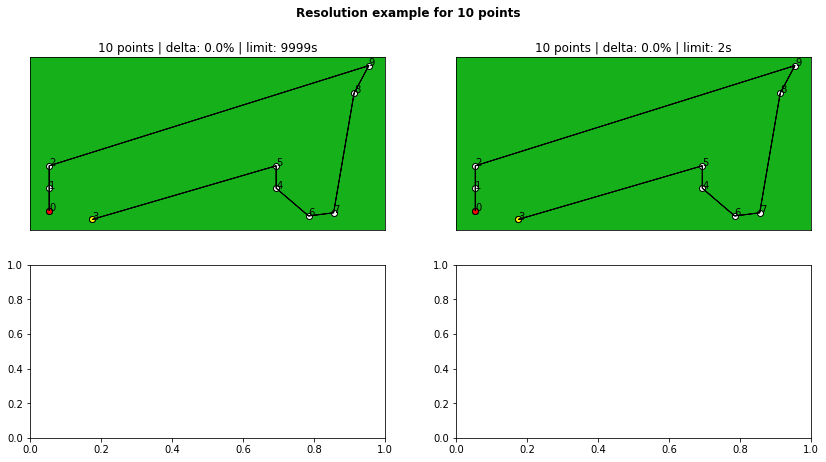

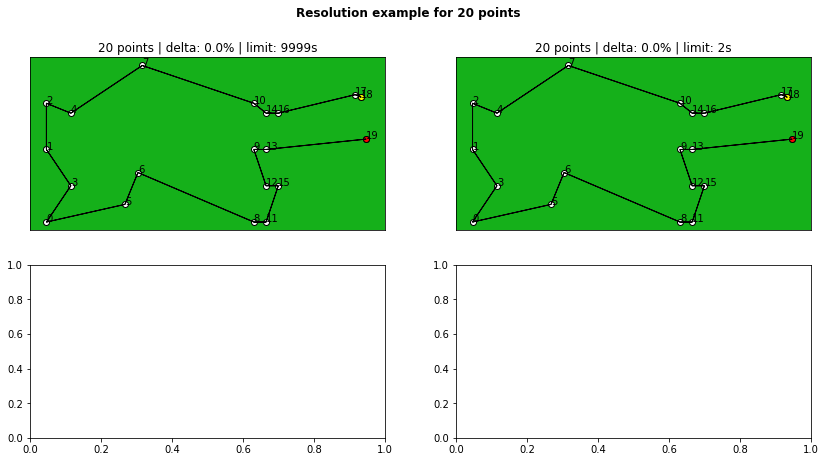

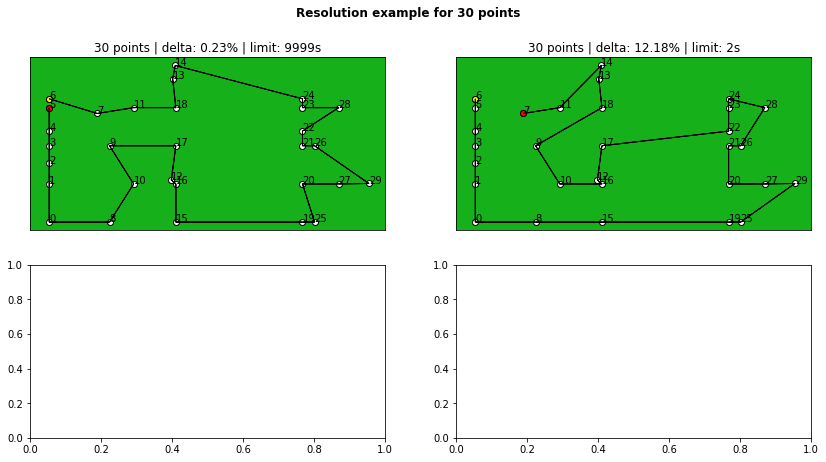

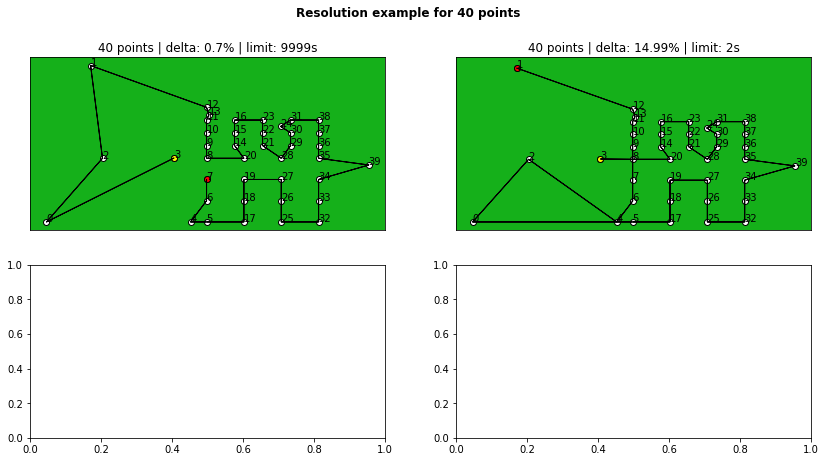

In [101]:
cols = 2
timingNr = len(res[list(res.keys())[0]]['1'].keys())
#rows = math.ceil(timingNr/cols)
rows=2
# for each point number show one example of distribution with resolution at different time limits
for point, val in res.items():
    fig, ax = plt.subplots(rows,cols,figsize=(14,7))
    fig.suptitle('Resolution example for {} points'.format(point), fontweight='bold')
    # get a random distribution id
    rndId = np.random.randint(1,len(val.keys())+1)
    # loop through timing of that specific distribution id
    count=0
    #print(rndId)
    #print(val[str(rndId)])
    orderedDic = collections.OrderedDict(sorted(val[str(rndId)].items(), reverse=True))
    for timing, val in orderedDic.items():
        delta = val['deltaFromOpt[%]']
        # plot
        r,c = currentRowCol(count,cols,rows)
        #print('rowcol',count,r,c)
        out = np.loadtxt('./points/{}/{}_{}_sol.txt'.format(point,rndId,timing), dtype=int)
        npzfile = np.load('./points/{}/{}.npz'.format(point,rndId))
        xTot = npzfile['xTot']
        yTot = npzfile['yTot']

        b = np.sum(out, axis=1)
        ordine = np.argsort(b)
        outOrd = out[ordine]
        boh, ordineNodi = np.nonzero(outOrd)

        firstNode = ordineNodi[0]
        lastNode = ordineNodi[-1]

        ax[r,c].scatter(xTot, yTot, c='white', edgecolors='black')
        ax[r,c].scatter(xTot[firstNode], yTot[firstNode], c='yellow', edgecolors='black')
        ax[r,c].scatter(xTot[lastNode], yTot[lastNode], c='red', edgecolors='black')
        ax[r,c].set_facecolor('xkcd:green')
        for i, l in enumerate(xTot):
            ax[r,c].annotate(i, (xTot[i], yTot[i]))
        for i in range(len(ordineNodi)-1):
            currNode = ordineNodi[i]
            nextNode = ordineNodi[i+1]
            ax[r,c].arrow(xTot[currNode], yTot[currNode], xTot[nextNode]-xTot[currNode], yTot[nextNode]-yTot[currNode])
        ax[r,c].get_xaxis().set_visible(False)
        ax[r,c].get_yaxis().set_visible(False)
        ax[r,c].set_title('{} points | delta: {}% | limit: {}s'.format(point, delta, timing))
        count+=1

# Resolution examples

# Adding time constraint
Check optimization result when introducing a time constraint